<a href="https://colab.research.google.com/github/SolomonAyuba/titanic-dataset/blob/main/Group_1_Titanic_Dataset_Lab_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**


---

> (Kindly refer to the [README](https://github.com/SolomonAyuba/titanic-dataset/blob/5017949d2733f29ad6a7f226a0b1e9417ea23358/README.md) file for a thorough documentation)

![DTS 202 data science Image.png]('/content/titanic_dataset_dts202/DTS2datascienceImage.png')



## **Problem Statement**

The Titanic dataset contains information about passengers aboard the Titanic and whether they survived or not. This project aims to apply data engineering techniques to pre-process the dataset and build a predictive model to determine whether a passenger survived based on various features.


## **Objective and Steps**
Perform comprehensive data engineering tasks such as data cleaning transformation, feature engineering, and preparing the dataset for predictive modeling.

1. Perform **Exploratory Data Analysis (EDA)** to understand the dataset.
2. Apply **data cleaning** techniques to handle missing values and outliers.
3. **Transform** the data using scaling, encoding, and feature engineering.
4. Prepare the dataset for **predictive modeling** by selecting relevant features.
5. Train and evaluate a simple **classification model** to predict survival.

## **Project Code Initiation**




#### **Step 1: Data Exploration**
* Load the Titanic dataset and display the first few rows.
* Explore the dataset structure and check for missing values.
* Visualize the relationships between key features and the target variable (Survived).

In [ ]:
# Importing the necessary python libraries for the project
import pandas as pd
import numpy as np
np.random.seed(22) #Ensures that the results are the same
#Viz. libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ML libraries - sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# The Titanic dataset is loaded from seaborn and the top 5 rows displayed
titanicDataset = sns.load_dataset('titanic')
print("Dataset Preview:")
titanicDataset.head()

Dataset Preview:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Get complete information on the dataset's structure
print("Dataset's Structure:")
titanicDataset.info()

Dataset's Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
titanicDataset.isna().sum()


Missing Values in Each Column:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


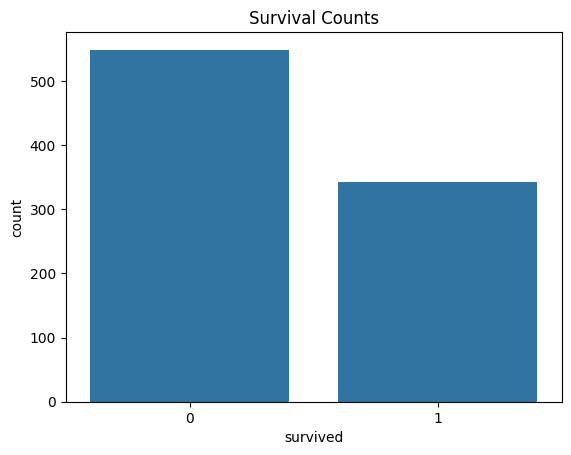

In [ ]:
# Visualize the relationship between 'Survived' and other key features
sns.countplot(x='survived', data=titanicDataset)
plt.title("Survival Counts")
plt.show()

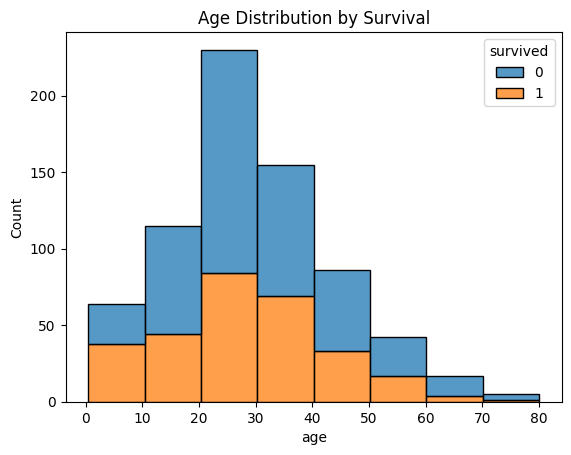

In [ ]:
sns.histplot(data=titanicDataset, x="age", hue="survived", multiple="stack", bins=8)
plt.title("Age Distribution by Survival")
plt.show()

#### **Step 2: Data Cleaning**
* Handle missing values: Impute missing values in Age, Embarked, and other columns as needed.

* Handle outliers: Use visualization tools like boxplots to detect and handle outliers in features like Fare.

In [ ]:
# Handle missing values by imputing where necessary

# Impute 'age' with the median age
titanicDataset.loc[:,'age'] = titanicDataset['age'].fillna(titanicDataset['age'].median())

# Impute 'embarked' with the mode (most common value)
titanicDataset.loc[:,'embarked'] = titanicDataset['embarked'].fillna(titanicDataset['embarked'].mode()[0])

# For 'deck', impute with a new category 'Unknown' as it has significant missing values
# Handle missing values in 'deck' by adding a new category 'Unknown' and then imputing missing values
titanicDataset['deck'] = titanicDataset['deck'].cat.add_categories(['Unknown'])
titanicDataset.loc[:,'deck'] = titanicDataset['deck'].fillna('Unknown')

# Drop 'embark_town' column as it duplicates 'embarked'
titanicDataset.drop(columns=['embark_town'], inplace=True)

# Drop 'alive' column as it doubles for 'survived'
titanicDataset.drop(columns=['alive'], inplace=True)

# Check again for missing values
print("\nMissing Values After Imputation:")
print(titanicDataset.isnull().sum())


Missing Values After Imputation:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
deck          0
alone         0
dtype: int64


In [ ]:
titanicDataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,True


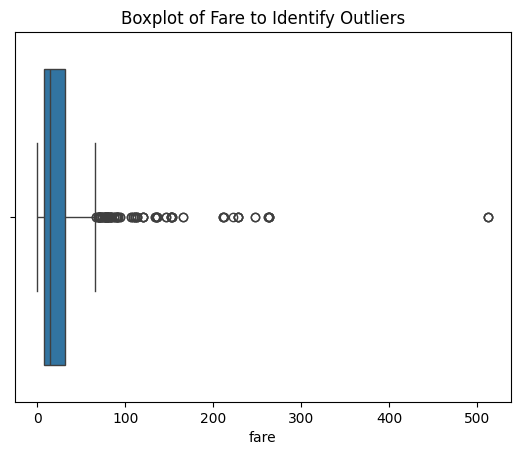

In [ ]:
# Handle outliers in 'fare' using visualization
sns.boxplot(data=titanicDataset, x='fare')
plt.title("Boxplot of Fare to Identify Outliers")
plt.show()

#### **Step 3: Feature Engineering**
* **Family Size:** Create a new feature by adding SibSp and Parch to form a FamilySize
feature.
* **Age Binning:** Bucket the Age feature into categories (e.g., children, teenagers, adults,
seniors).
* **Fare Binning:** Categorize the Fare feature into groups based on ticket price ranges.

In [ ]:
# Create a new feature 'FamilySize' by adding 'sibsp' and 'parch' (number of siblings/spouses + parents/children)
titanicDataset['FamilySize'] = titanicDataset['sibsp'] + titanicDataset['parch']

# Age Binning - create categories for Age (e.g., 'Child', 'Teen', 'Adult', 'Senior')
age_bins = [0, 12, 18, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']
titanicDataset['AgeGroup'] = pd.cut(titanicDataset['age'], bins=age_bins, labels=age_labels)

# Fare Binning - create fare categories (e.g., 'Low', 'Medium', 'High', 'Very High')
fare_bins = [-1, 7.9, 14.4, 31, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
titanicDataset['FareGroup'] = pd.cut(titanicDataset['fare'], bins=fare_bins, labels=fare_labels)

In [ ]:
titanicDataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone,FamilySize,AgeGroup,FareGroup
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,False,1,Adult,Low
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False,1,Adult,Very High
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,True,0,Adult,Medium
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False,1,Adult,Very High
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,True,0,Adult,Medium


#### **Step 4: Data Transformation**
* Encode categorical variables like Sex, Embarked, and newly created features
(AgeGroup, FareGroup).
* Scale numerical features (Fare, Age, FamilySize) using a standard scaler or min-max
scaler.

In [ ]:
# Encode categorical variables (Sex, Embarked, AgeGroup, FareGroup) using LabelEncoder
le = LabelEncoder()

titanicDataset['sex'] = le.fit_transform(titanicDataset['sex'])
titanicDataset['embarked'] = le.fit_transform(titanicDataset['embarked'])
titanicDataset['AgeGroup'] = le.fit_transform(titanicDataset['AgeGroup'])
titanicDataset['FareGroup'] = le.fit_transform(titanicDataset['FareGroup'])
titanicDataset['who'] = le.fit_transform(titanicDataset['who'])
titanicDataset['adult_male'] = le.fit_transform(titanicDataset['adult_male'])
titanicDataset['deck'] = le.fit_transform(titanicDataset['deck'])
titanicDataset['class'] = le.fit_transform(titanicDataset['class'])
titanicDataset['alone'] = le.fit_transform(titanicDataset['alone'])

# Scale numerical features ('fare', 'age', 'FamilySize')
scaler = StandardScaler()
titanicDataset[['fare', 'age', 'FamilySize']] = scaler.fit_transform(titanicDataset[['fare', 'age', 'FamilySize']])

In [ ]:
titanicDataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone,FamilySize,AgeGroup,FareGroup
0,0,3,1,-0.565736,1,0,-0.502445,2,2,1,1,7,0,0.059160,0,1
1,1,1,0,0.663861,1,0,0.786845,0,0,2,0,2,0,0.059160,0,3
2,1,3,0,-0.258337,0,0,-0.488854,2,2,2,0,7,1,-0.560975,0,2
3,1,1,0,0.433312,1,0,0.420730,2,0,2,0,2,0,0.059160,0,3
4,0,3,1,0.433312,0,0,-0.486337,2,2,1,1,7,1,-0.560975,0,2


Text(0.5, 1.0, 'Correlation between dependent variables and target variable')

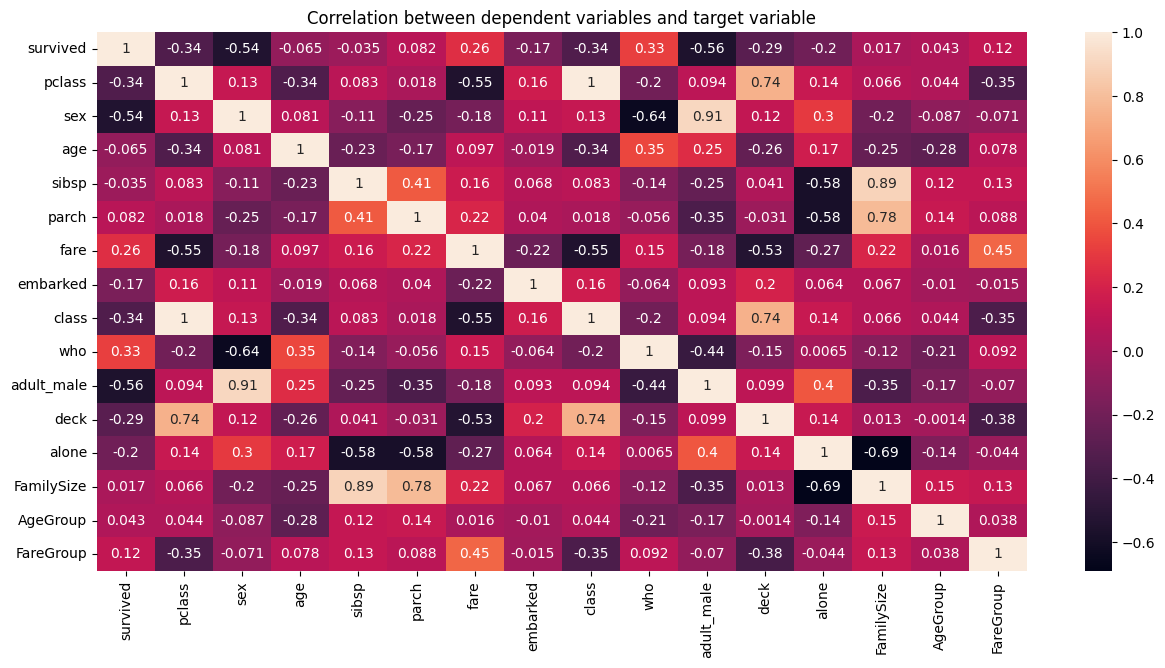

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(titanicDataset.corr(), annot=True)
plt.title("Correlation between dependent variables and target variable")

In [ ]:
titanicDataset.corr()[titanicDataset.corr()['survived'].abs()>0.1].index

Index(['survived', 'pclass', 'sex', 'fare', 'embarked', 'class', 'who',
       'adult_male', 'deck', 'alone', 'FareGroup'],
      dtype='object')

#### **Step 5: Model Preparation**
* Split the data into training and testing sets (70% training, 30% testing).
* Train a simple classification model (Logistic Regression) to predict survival.
* Evaluate the model using accuracy, confusion matrix, and classification report.

In [ ]:
X = titanicDataset[['pclass', 'sex', 'fare', 'embarked', 'class', 'who','adult_male', 'deck', 'alone', 'FareGroup']]
y = titanicDataset['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
#Testing 3 different models to see which has the best accuracy
# List of classifiers
classifiers = [ ('Logistic Regression', LogisticRegression()),
                ('Decision Tree', DecisionTreeClassifier()),
                ('Random Forest', RandomForestClassifier()) ]
# Train classifiers and print accuracy scores
for name, clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7686567164179104
Decision Tree Accuracy: 0.8022388059701493
Random Forest Accuracy: 0.7910447761194029


In [ ]:
# Train the Logistic Regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.97%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[133  27]
 [ 24  84]]


In [ ]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       160
           1       0.76      0.78      0.77       108

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

